In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string

In [12]:
np.random.seed(42)

In [3]:
df = pd.read_csv('train.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Label Distribution

C:\Users\24728\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


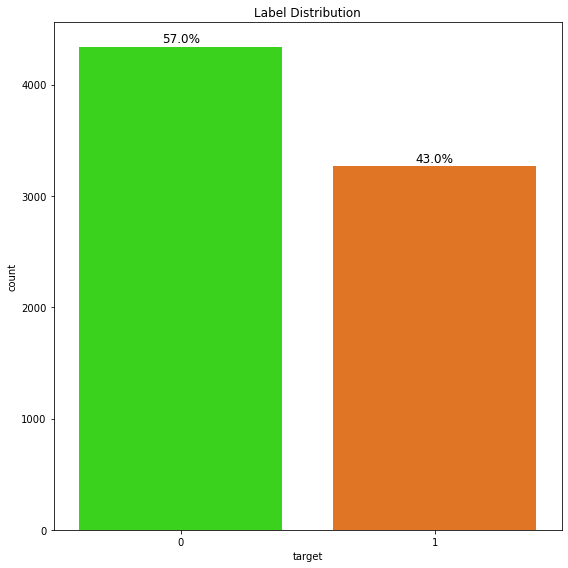

In [86]:
ax = sns.countplot(df['target'], palette = 'gist_ncar')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Label Distribution')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', size=12)
plt.tight_layout()
plt.show()

From the distribution, we can see that the split between the two labels was around 57% to 43%, thus we would consider it as a balanced data set.

### WordCloud

In [19]:
real_df = df[df.target==1]
fake_df = df[df.target==0]
mask1 = np.array(Image.open("tt.png"))
mask2 = np.array(Image.open("tt2.png"))

In [87]:
stopwords = STOPWORDS
stopwords.add('t')
stopwords.add('co')
stopwords.add('Û')
stopwords.add('u')
stopwords.add('m')
stopwords.add('s')
stopwords.add('https')
stopwords.add('amp')
stopwords.add('don')

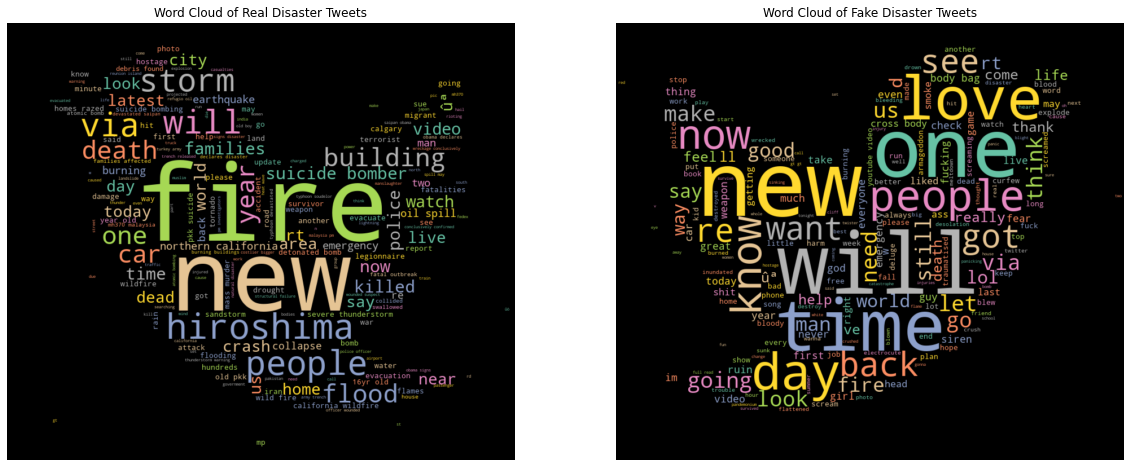

<Figure size 432x288 with 0 Axes>

In [88]:
fig = plt.figure(figsize = (20,12))
text_fake = ','.join(fake_df.text.values).lower()
text_fake = text_fake.translate(str.maketrans(dict.fromkeys(string.punctuation, ' ')))
wordcloud2 = WordCloud(stopwords=stopwords, mask=mask1,background_color='black',colormap='Set2').generate(text_fake)
text_real = ','.join(real_df.text.values).lower()
text_real = text_real.translate(str.maketrans(dict.fromkeys(string.punctuation, ' ')))
wordcloud1 = WordCloud(stopwords=stopwords, mask=mask2,background_color='black',colormap='Set2').generate(text_real)
plt.subplot(1,2,1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Real Disaster Tweets')
plt.subplot(1,2,2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Fake Disaster Tweets')
plt.show()
plt.savefig('text-wordcloud.png')

In [89]:
print('Top 10 frequent words in real disaster tweets:', list(wordcloud1.words_.keys())[:10])

Top 10 frequent words in real disaster tweets: ['fire', 'new', 'hiroshima', 'people', 'via', 'will', 'storm', 'building', 'one', 'year']


In [90]:
print('Top 10 frequent words in fake disaster tweets:', list(wordcloud2.words_.keys())[:10])

Top 10 frequent words in fake disaster tweets: ['new', 'will', 'one', 'time', 'love', 'day', 'people', 'know', 'now', 'back']


We find that some frequent words in real disaster tweets, such as 'fire', 'storm' and 'hiroshima', being able to pinpoint the type or location of the disasters and indicating that its content might be relevant to real disasters.